In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils

In [31]:
# Reading the image
image = cv2.imread('flower.jpeg')

# Keeping a copy of it for future use
image_copy = image.copy()

image.shape

(900, 1200, 3)

In [32]:
# Preprocessing
image = imutils.resize(image, height=600)
image.shape

(600, 800, 3)

In [33]:
# In flattening we keep all the columns of the image after each other to make one column out of it.
flattern_image = np.reshape(image,(-1,3))
flattern_image.shape

(480000, 3)

In [34]:
# Kmeans model
# The colors of image pixels will now be clustered into 7 groups. (or any other number, just set another clusters number)
#  These groups will have some centroids which we can think of as the major color of the cluster.

# number of clusers
clusters = 7
model= KMeans(n_clusters=clusters, random_state=0)
model.fit(flattern_image)

KMeans(n_clusters=7, random_state=0)

In [35]:
dominant_colors= np.array(model.cluster_centers_,dtype='uint')
print(dominant_colors)

[[252 251 251]
 [115  75 163]
 [ 38  34  70]
 [204 194 222]
 [241 237 239]
 [ 81 137 153]
 [159 140 201]]


In [36]:

percentages = (np.unique(model.labels_, return_counts=True))[1]/ flattern_image.shape[0]
print(percentages)

# Zipping percentages and colors together. It will consist of 7 tuples (because of 7 clusters)
p_and_c = zip(percentages,dominant_colors)

# Sort this zip object in descending order
# Now the first element in this sorted object will be the percentage of the most dominant color in the image and the color itself.
p_and_c = sorted(p_and_c,reverse=True)

# print(p_and_c)

[0.66981458 0.02702917 0.02179167 0.05560208 0.16560417 0.01722917
 0.04292917]


([], [])

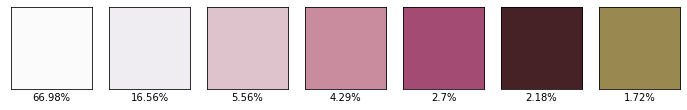

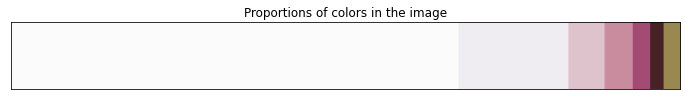

In [37]:
# plotting blocks of dominant colors
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)
block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))

for i in range(clusters):
    plt.subplot(1,clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')
bar = np.ones((50,500,3),dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Proportions of colors in the image')
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*bar.shape[1])
    if i==clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1

plt.imshow(bar)
plt.xticks([])
plt.yticks([])
